# Simple Neural Network Exercise (Core)
- Student: Michael McCann
- Date: 04 APR 2022

In [23]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import set_config
set_config(display='diagram')


In [2]:
## Improt Data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTRfoQAojPwNsw33zUSpBg32DuK2z0WvLPptGOncIXa38tN3RWk9puvelcmsIIhFb_XF12RD7PdqCwf/pub?output=csv'
df = pd.read_csv(url)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
print(f'NAs {df.isna().sum().sum()}')
print(f'Dupes {df.duplicated().sum()}\n\n')

df.describe()

NAs 0
Dupes 0




,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
# Entry with resting BP and cholestorol of 0 seems off....
bad_col = df[df['RestingBP'] == 0].index
df.drop(bad_col, inplace = True)

# Inspect high values of cholestorol
df['Cholesterol'].sort_values(ascending = False).head()

149    603
616    564
76     529
30     518
250    491
Name: Cholesterol, dtype: int64

In [61]:
# Define feature matrix and target
X = df.drop(columns = 'HeartDisease') # Feature Matrix
y = df['HeartDisease'] # Target

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [62]:
# num/cat selector
num_sel = make_column_selector(dtype_include = 'number')
cat_sel = make_column_selector(dtype_include = 'object')

# Instantiate Transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# Create Tuple
num_tuple = (scaler, num_sel)
cat_tuple = (ohe, cat_sel)

# Compine into column transformer
processor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [63]:
# Transform the data
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

In [64]:
# Get Feature numbers
input_shape = X_train.shape[1]

## Initial Model: 2 Layer, ReLu Activation, 30 Epoch

In [65]:
# Instantiate Sequential Model
model = Sequential()

In [66]:
# First hidden layer
model.add(Dense(11,
                input_dim = input_shape,
                activation = 'relu'))

# Second hidden layer
model.add(Dense(5,
                activation = 'relu'))

# Output layer - classificaiton problem.
model.add(Dense(1,
                activation = 'sigmoid'))

In [67]:
# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')

In [68]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 30)

Epoch 1/30
22/22 [==============================] - 1s 7ms/step - loss: 0.5864 - val_loss: 0.4572
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 0.5134 - val_loss: 0.4085
Epoch 3/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4674 - val_loss: 0.3784
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4315 - val_loss: 0.3590
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4055 - val_loss: 0.3440
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 0.3856 - val_loss: 0.3341
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3690 - val_loss: 0.3287
Epoch 8/30
22/22 [==============================] - 0s 2ms/step - loss: 0.3570 - val_loss: 0.3235
Epoch 9/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3489 - val_loss: 0.3198
Epoch 10/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3405 - val_loss: 0.3188
Epoch 11/30
22/22 [

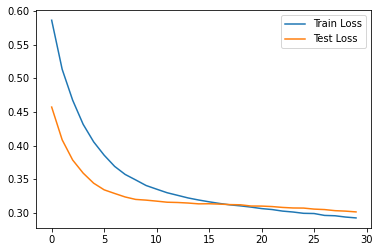

In [69]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

After 30 epochs result in a ~.30 testing loss

## Model 2: Same Model different Activation Function (softmax)

In [70]:
# Instantiate Sequential Model
model2 = Sequential()

# First hidden layer
model2.add(Dense(11,
                input_dim = input_shape,
                activation = 'softmax'))

# Second hidden layer
model2.add(Dense(5,
                activation = 'softmax'))

# Output layer - classificaiton problem.
model2.add(Dense(1,
                activation = 'sigmoid'))

# Compile the model
model2.compile(loss = 'bce', optimizer = 'adam')

Epoch 1/30
22/22 [==============================] - 1s 9ms/step - loss: 0.7123 - val_loss: 0.7043
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 0.7043 - val_loss: 0.6978
Epoch 3/30
22/22 [==============================] - 0s 2ms/step - loss: 0.6973 - val_loss: 0.6922
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6910 - val_loss: 0.6868
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6851 - val_loss: 0.6810
Epoch 6/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6785 - val_loss: 0.6752
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6720 - val_loss: 0.6686
Epoch 8/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6649 - val_loss: 0.6613
Epoch 9/30
22/22 [==============================] - 0s 2ms/step - loss: 0.6572 - val_loss: 0.6528
Epoch 10/30
22/22 [==============================] - 0s 3ms/step - loss: 0.6488 - val_loss: 0.6437
Epoch 11/30
22/22 [

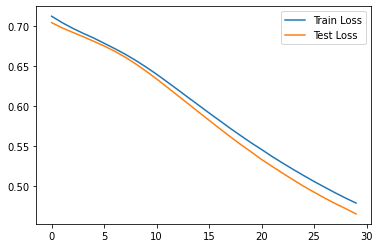

In [71]:
history2 = model2.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 30)

plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Test Loss')
plt.legend()

After 30 epochs result in a ~.45 testing loss

## Model 3: Double the Layers 

In [81]:
# Instantiate Sequential Model
model3 = Sequential()

# First hidden layer
model3.add(Dense(11,
                input_dim = input_shape,
                activation = 'relu'))

# Second hidden layer
model3.add(Dense(11,
                activation = 'relu'))

# Third hidden layer
model3.add(Dense(11,
                activation = 'relu'))

# Fourth hidden layer
model3.add(Dense(11,
                activation = 'relu'))

# Output layer - classificaiton problem.
model3.add(Dense(1,
                activation = 'sigmoid'))

# Compile the model
model3.compile(loss = 'bce', optimizer = 'adam')

Epoch 1/30
22/22 [==============================] - 1s 8ms/step - loss: 0.6421 - val_loss: 0.6001
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 0.5718 - val_loss: 0.5166
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4993 - val_loss: 0.4406
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4387 - val_loss: 0.3857
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4014 - val_loss: 0.3581
Epoch 6/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3787 - val_loss: 0.3479
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3596 - val_loss: 0.3389
Epoch 8/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3472 - val_loss: 0.3360
Epoch 9/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3362 - val_loss: 0.3319
Epoch 10/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3290 - val_loss: 0.3301
Epoch 11/30
22/22 [

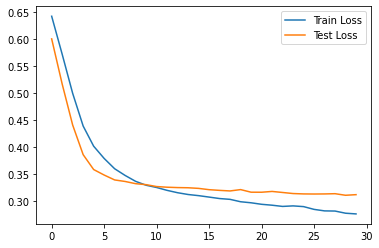

In [82]:
history3 = model3.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 30)

plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Test Loss')
plt.legend()

After 30 epochs result in a ~.31 testing loss

The initial and third models performed the best.